<a href="https://colab.research.google.com/github/minteria/hello-world/blob/master/module5_labAssign_MyraInteriano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Titanic Dataset
The Titanic dataset is a well-known dataset in the field of data science and machine learning. It contains information about the passengers who were on board the Titanic when it sank, including their age, gender, class, and whether or not they survived. The goal of this assignment is to prepare the Titanic dataset.

### Introduction
In this assignment, you will be working with the Titanic dataset, which contains information about passengers on the Titanic, including whether or not they survived. Your task is to preprocess the data, convert all data to numeric data for scikit-learn, and perform feature selection using the f_classif() function. Additionally, you will calculate the Pearson correlation coefficient between each pair of features in the dataset to identify any highly correlated features.

### Data Preprocessing
1. Load the Titanic dataset into a Pandas DataFrame.
2. Check for missing values and fill them in appropriately.
3. Convert non-numeric data to numeric data using the get_dummies() function from Pandas. Be sure to exclude any columns that won't be used for analysis (e.g. PassengerId, Name, Ticket, Cabin).

### Feature Selection
1. Split the dataset as shown in the code below.
2. Fit a decision tree classifier to the training set using the DecisionTreeClassifier() class from
3. Calculate the f-score and p-values for each feature in the dataset using the f_classif() function from scikit-learn. Print out the f-score and p-value for each feature.
4. Calculate the Pearson correlation coefficient between each pair of features in the dataset using the corr() function from Pandas. Print out the correlation coefficient and the p-value for any pair of features that have a statistically significant correlation (p-value less than 0.05).

### Deliverables
A Jupyter notebook containing your code and comments.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from scipy.stats import pearsonr

In [2]:
# Load the Titanic Dateset
data = pd.read_csv('/content/titanic.csv')

In [3]:
# Explore the dataset and identify any missing values using isnul().sum()
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


We see that the Age, Cabin, and Embarked columsn contain missing values.

In [4]:
# Fill in any missing values with appropriate values (e.g., mean or median values).
# using fillna() to fill the median() values for missing values for feature Age
data['Age'].fillna(data['Age'].median(), inplace=True)

# We use [0] on mode because it can return more than one value and
# we are choosing the first instance
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

Above we replaced any missing values in the Age column wit the median of the data. For Embarked, we chose the first value in mode to replace and missing values. Cabin is a non-numerical feature we will be dropping from the dataframe, so its missing values are not addressed.

In [5]:
# Apply one-hot encoding to non-numeric features (Sex and Embarked) using the .get_dummies method
sex_ohe = pd.get_dummies(data['Sex'], prefix='SEX', prefix_sep='=')
embarked_ohe = pd.get_dummies(data['Embarked'], prefix='EMBARKED', prefix_sep='=')
data = pd.concat([data, sex_ohe, embarked_ohe], axis=1)
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

Above we made numeric columns for the non-numeric 'Sex' and 'Embarked' columns using one-hot encoding. The one hot encoding makes new columns and we use the pandas concat method to combine the dataframes and then drop the old non-numeric columns that are now represented by the new one-hot encoded columns.

In [6]:
# Display top 10 lines from the dataset
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  33.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   
5                                   Moran, Mr. James  28.0      0      0   
6                            McCarthy, Mr. Timothy J  54.0      0      

In [7]:
# Split the dataset into features (X) and label (y)
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [8]:
# Display X dataframe info() with features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   SEX=female  891 non-null    uint8  
 6   SEX=male    891 non-null    uint8  
 7   EMBARKED=C  891 non-null    uint8  
 8   EMBARKED=Q  891 non-null    uint8  
 9   EMBARKED=S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [9]:
# Display y dataframe info() with features
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [10]:
# Calculate the F-scores and p-values for each numeric feature using f_classif()
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(X, y)

In [11]:
# Calculate the f-score and p-values for each feature in the dataset
for i, feature in enumerate(X.columns):
    print("Feature:", feature)
    print("F-score:", f_scores[i])
    print("P-value:", p_values[i])
    print("------------------------")

Feature: Pclass
F-score: 115.03127218827744
P-value: 2.537047387979699e-25
------------------------
Feature: Age
F-score: 3.850248832072658
P-value: 0.050050216267598986
------------------------
Feature: SibSp
F-score: 1.1105722041132329
P-value: 0.29224392869817906
------------------------
Feature: Parch
F-score: 5.963463836603494
P-value: 0.0147992453747224
------------------------
Feature: Fare
F-score: 63.03076422804438
P-value: 6.120189341922221e-15
------------------------
Feature: SEX=female
F-score: 372.40572360221495
P-value: 1.406066130879597e-69
------------------------
Feature: SEX=male
F-score: 372.40572360221483
P-value: 1.406066130879597e-69
------------------------
Feature: EMBARKED=C
F-score: 25.89598699556588
P-value: 4.3971513298052554e-07
------------------------
Feature: EMBARKED=Q
F-score: 0.011846343990383331
P-value: 0.9133532352434973
------------------------
Feature: EMBARKED=S
F-score: 20.374459882803
P-value: 7.223240983686276e-06
------------------------


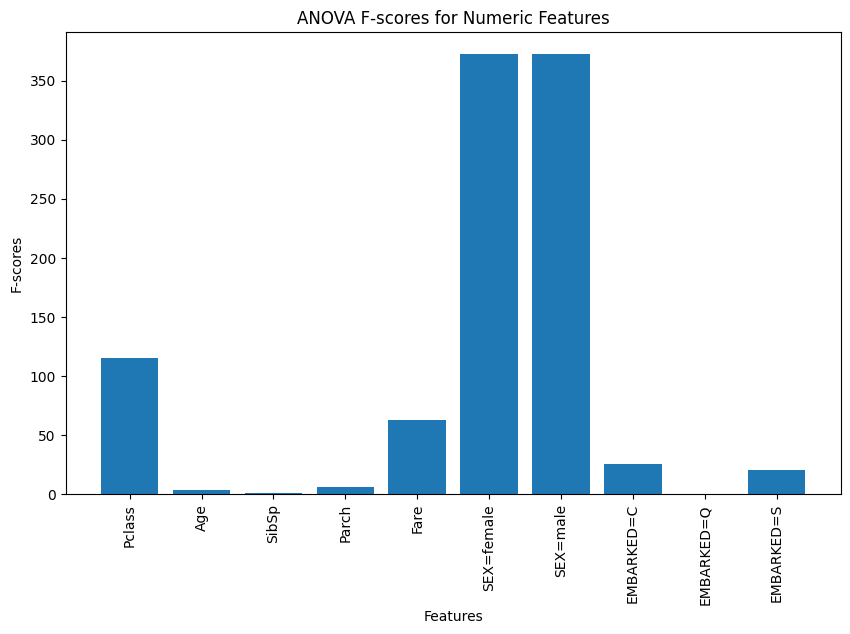

In [12]:
# Create a bar chart to visualize the F-scores for each numeric feature
# Change this code as needed
plt.figure(figsize=(10, 6))
plt.bar(X.select_dtypes(include=np.number).columns, f_scores)
plt.title('ANOVA F-scores for Numeric Features')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.xticks(rotation=90)
plt.show()

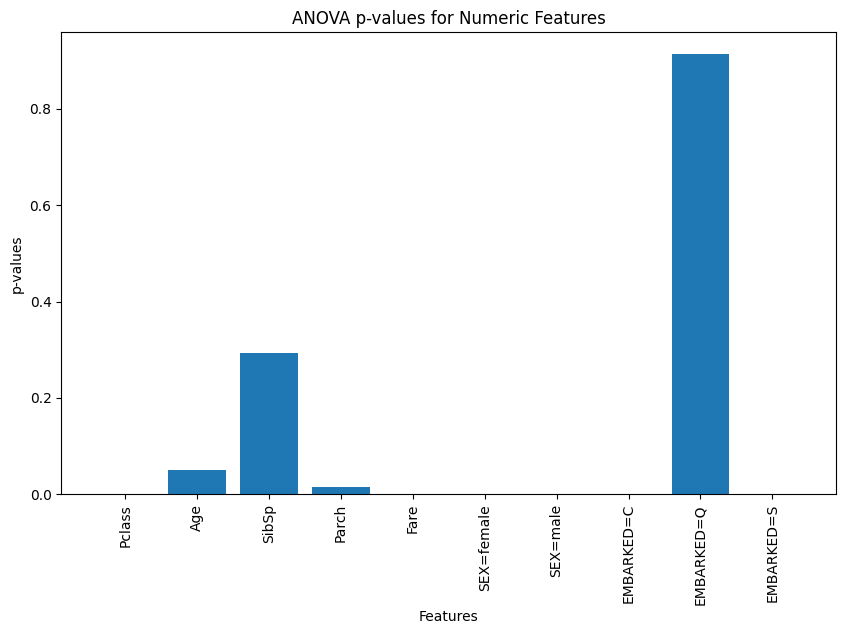

In [15]:
# Create a bar chart to visualize the p-values for each numeric feature
# Change this code as needed

plt.figure(figsize=(10, 6))
plt.bar(X.select_dtypes(include=np.number).columns, p_values)
plt.title('ANOVA p-values for Numeric Features')
plt.xlabel('Features')
plt.ylabel('p-values')
plt.xticks(rotation=90)
plt.show()


In [14]:
# Analyze the results and write a a few lines discussing the following:
# * Which numeric features have the highest F-scores? What does this indicate about their relationship with the target variable?
# * Which numeric features have the lowest p-values? What does this indicate about their significance?
# * Based on your analysis, which numeric features do you think are the most important for predicting the target variable?

The features with the highest F-scores are: Sex = Female or Male, PClass, Fare, and Embarked = C or S listed in decreasing value. For F-scores, the higher the value, the more significant the relationship between the target value and the feature. Therefore the features listed are the most important according to their F-score for explaining the target variable, Survival.

The features with the lowest p-values are SEX = Female or Male, PClass, Fare and Embarked = C or S in order of increasing value. Each of these values is significantly smaller than .05 indicating that the relationship between that feature and the target value is statistically significant. In particular the p-value tells us in particular that the features differ significantly between their target values and therefore may have predictive power.

Therefore, according to these tests we can conclude that Sex = Female or Male, Pclass (Ticket Class), Fare and Embarked = C or S (point of embarkation Cherbourg or Southampton) are the most important for predicting the target variable.

Pclass - f-score: 115.03127218827744, p-value: 2.537047387979699e-25
Age - f-score: 3.850248832072658, p-value: 0.050050216267598986
SibSp - f-score: 1.1105722041132329, p-value: 0.29224392869817906
Parch - f-score: 5.963463836603494, p-value: 0.0147992453747224
Fare - f-score: 63.03076422804438, p-value: 6.120189341922221e-15
SEX=female - f-score: 372.40572360221495, p-value: 1.406066130879597e-69
SEX=male - f-score: 372.40572360221483, p-value: 1.406066130879597e-69
EMBARKED=C - f-score: 25.89598699556588, p-value: 4.3971513298052554e-07
EMBARKED=Q - f-score: 0.011846343990383331, p-value: 0.9133532352434973
EMBARKED=S - f-score: 20.374459882803, p-value: 7.223240983686276e-06


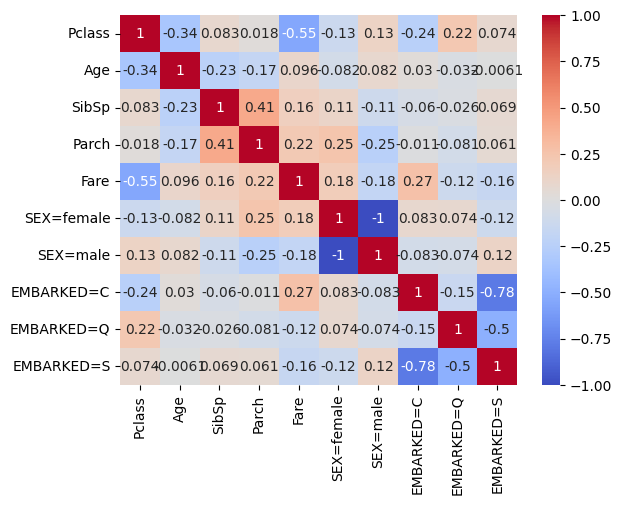

In [18]:
# Calculate the f-score and p-values for each feature in the dataset
# Analyze the results and write a a few lines discussing the findings

f_score, p_value = f_classif(X, y)
for i, col in enumerate(X.columns):
    print(f"{col} - f-score: {f_score[i]}, p-value: {p_value[i]}")

# Calculate the Pearson correlation coefficient between each pair of features in the dataset
# Use the .corr() method
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

From the correlation matrix, we can see that the highly correlated feature pairs are female/male and embarked=c/embarked=s.